In [36]:
load = False

if load == True:

  with open("Butterfly_Classification_Model.pkl", "rb") as f: 
      model = pickle.load(f)

In [35]:
!wget  http://www.josiahwang.com/dataset/leedsbutterfly/leedsbutterfly_dataset_v1.0.zip

--2022-06-09 16:42:11--  http://www.josiahwang.com/dataset/leedsbutterfly/leedsbutterfly_dataset_v1.0.zip
Resolving www.josiahwang.com (www.josiahwang.com)... 143.95.240.28
Connecting to www.josiahwang.com (www.josiahwang.com)|143.95.240.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 476389461 (454M) [application/zip]
Saving to: ‘leedsbutterfly_dataset_v1.0.zip.1’

leedsbutterfly_data 100%[===================>] 454.32M  67.0MB/s    in 7.1s    

2022-06-09 16:42:18 (63.8 MB/s) - ‘leedsbutterfly_dataset_v1.0.zip.1’ saved [476389461/476389461]



In [2]:
!unzip /content/leedsbutterfly_dataset_v1.0.zip

Archive:  /content/leedsbutterfly_dataset_v1.0.zip
   creating: leedsbutterfly/descriptions/
  inflating: leedsbutterfly/descriptions/001.txt  
  inflating: leedsbutterfly/descriptions/002.txt  
  inflating: leedsbutterfly/descriptions/003.txt  
  inflating: leedsbutterfly/descriptions/004.txt  
  inflating: leedsbutterfly/descriptions/005.txt  
  inflating: leedsbutterfly/descriptions/006.txt  
  inflating: leedsbutterfly/descriptions/007.txt  
  inflating: leedsbutterfly/descriptions/008.txt  
  inflating: leedsbutterfly/descriptions/009.txt  
  inflating: leedsbutterfly/descriptions/010.txt  
   creating: leedsbutterfly/images/
  inflating: leedsbutterfly/images/0010001.png  
  inflating: leedsbutterfly/images/0010002.png  
  inflating: leedsbutterfly/images/0010004.png  
  inflating: leedsbutterfly/images/0010005.png  
  inflating: leedsbutterfly/images/0010006.png  
  inflating: leedsbutterfly/images/0010007.png  
  inflating: leedsbutterfly/images/0010008.png  
  inflating: leeds

In [3]:
import os

butterNames = {}

pat = '/content/leedsbutterfly/descriptions/'

for idx, i in enumerate(os.listdir(pat)):
  #print(pat + i)
  with open(pat + i) as f:
    lines = f.readlines()
    name = lines[0]
    #print(name)
    j = i[1:3]
    #print(j[0])
    if j[0] == '0':
      #print('if')
      j=j[1]

    butterNames[name] = (i,j) 

print(butterNames)

{'Junonia coenia\n': ('004.txt', '4'), 'Pieris rapae\n': ('008.txt', '8'), 'Danaus plexippus\n': ('001.txt', '1'), 'Heliconius charitonius\n': ('002.txt', '2'), 'Heliconius erato\n': ('003.txt', '3'), 'Nymphalis antiopa\n': ('006.txt', '6'), 'Papilio cresphontes\n': ('007.txt', '7'), 'Vanessa atalanta\n': ('009.txt', '9'), 'Vanessa cardui\n': ('010.txt', '10'), 'Lycaena phlaeas\n': ('005.txt', '5')}


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#%matplotlib inline  # if you are running this code in Jupyter notebook
from google.colab.patches import cv2_imshow
import torch
from torch import nn

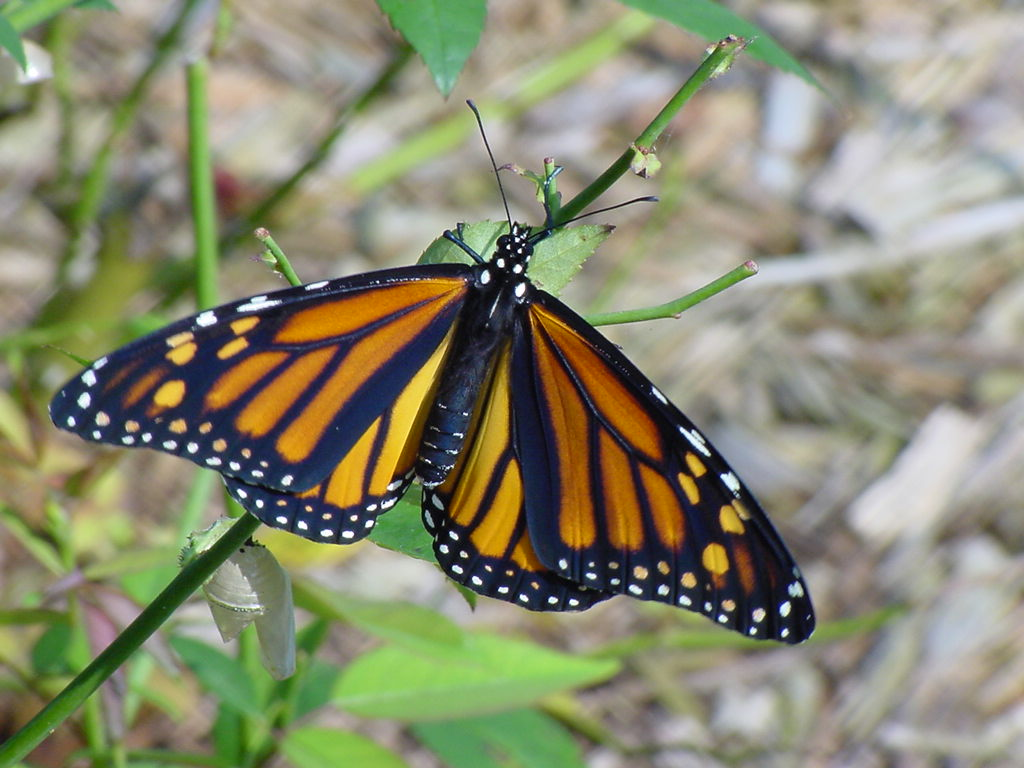

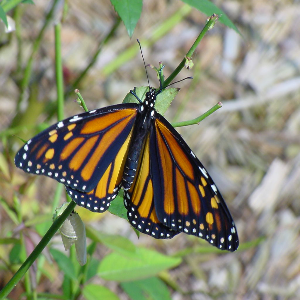

In [5]:
# reads image 'opencv-logo.png' as grayscale
img = cv2.imread('/content/leedsbutterfly/images/0010001.png') #second arg = col, ie 0=greyscale
cv2_imshow(img)

#resize img
img = cv2.resize(img, (300,300))
cv2_imshow(img)
#has changes aspect ratio of img but as this will apply to all img the error should be systematic and therefore be ignorable.

In [6]:
#on to neural net
#convolutional layres for img
#couple of convolutions- extract features.
#input those features into a linear layre for catagorisation
#final output = 10 numbers, highest number is what the nn is guessing for that pic

#input size ~ ((weidth * height) * #channels)  * batchsize

#get everything in to right shape.
#input size dimension(inputsize.shape), change through layres.


#data. ten species pof butterfly.
#~800 images.


# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

#conv will change us from 3 channel (RGB) to one channel


# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.conv2d_1 = nn.Sequential(
            nn.Conv2d(3, 1, 3, stride=1), #reduce from 3 channel to one channel
        )
        self.conv1d_1 = nn.Sequential(
            nn.Conv1d(100, 1, 3, stride=1), #reduce from 100 width to 1 w
        )
        self.linear_1 = nn.Sequential( #   reduces width from 298 to 100 w
            nn.Linear(298, 100),
            nn.ReLU(),
  
        )
        self.linear_2 = nn.Sequential( #   reduces width from 298 to 100 w
            nn.Linear(296, 10),
            nn.Softmax(),
  
        )

    def forward(self, x):
      #forward method. opposition to backward pass
        print(x.shape)
        x = torch.unsqueeze(x, 0)
        print(x.shape)
        #batch_size, channels, depth, height, width
        x= torch.reshape(x, [1, 3, 300, 300])
        print(x.shape)
        x = self.conv2d_1(x)
        x = torch.squeeze(x)
        print(x.shape)
        x = self.linear_1(x)
        print('for_lin11',x.shape)
        x= torch.reshape(x, [1, 100, 298])
        x = self.conv1d_1(x)
        x = torch.squeeze(x)
        print('aroudnd lin 2', x.shape)
        x = self.linear_2(x)

        return x
        

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv2d_1): Sequential(
    (0): Conv2d(3, 1, kernel_size=(3, 3), stride=(1, 1))
  )
  (conv1d_1): Sequential(
    (0): Conv1d(100, 1, kernel_size=(3,), stride=(1,))
  )
  (linear_1): Sequential(
    (0): Linear(in_features=298, out_features=100, bias=True)
    (1): ReLU()
  )
  (linear_2): Sequential(
    (0): Linear(in_features=296, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)


In [7]:
#Loss channel
loss_fn = nn.MSELoss() #mean2 error. #nn.CrossEntropyLoss() #normalising, probability
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [8]:
#each back propagartion, shows which layres have highest gradients. grafients av over neurons/layre
def plot_grad_flow(named_parameters):
    ave_grads = []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            ave_grads.append(p.grad.abs().mean())
    plt.plot(ave_grads, alpha=0.3, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, linewidth=1, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(xmin=0, xmax=len(ave_grads))
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)

In [9]:
# train
def train(image, label, model, loss_fn, optimizer):
    model.train()

    # Compute prediction error
    #model =  brain. take simage as input. outputs a predication.
    #compartes this predication to label.
    # if match is close- loss =  low, visa versa.
    pred = model(image)
    print('pred ^ Lab', pred.shape, label.shape)
    loss = loss_fn(pred, label)

    # Backpropagation
    optimizer.zero_grad() # set gradient = 0.
    loss.backward() # loss is sent backwards via chain rule  to create gradients.
    optimizer.step() #changes all weights and biases in accordance with gradients.
    plot_grad_flow(model.named_parameters())
    return loss.item(), pred

#collect loss

In [30]:
import random
#creating train & test
imgPat = '/content/leedsbutterfly/images/'
imgList = os.listdir(imgPat)
imgNum= len(imgList)

#randomise data
random.shuffle(imgList)
#two lists of numpy arrays
butTrain, butTest = imgList[0: int(imgNum*0.7)], imgList[int(imgNum*0.7) : -1]

print(butTrain[0: 10], butTest[0:10])
print(len(butTrain), len(butTest))

['0100045.png', '0060092.png', '0060150.png', '0070063.png', '0100157.png', '0100128.png', '0010049.png', '0050021.png', '0080020.png', '0050046.png'] ['0060193.png', '0020104.png', '0080018.png', '0010019.png', '0010023.png', '0090099.png', '0100092.png', '0090126.png', '0080002.png', '0030008.png']
582 249


0100045.png
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])
/content/leedsbutterfly/images/0100045.png
[[[  5   0   0]
  [  0   1   0]
  [  0   1   2]
  ...
  [  0   0   1]
  [  0   1   0]
  [  2   0   0]]

 [[  0   1   1]
  [ 10  31  16]
  [ 12  29  15]
  ...
  [ 15  29  18]
  [ 17  34  23]
  [  0   0   0]]

 [[  0   0   0]
  [ 13  32  15]
  [ 15  33  16]
  ...
  [ 13  30  16]
  [ 16  34  21]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [ 32  76  39]
  [ 31  80  36]
  ...
  [233 206 240]
  [231 201 236]
  [  0   0   0]]

 [[  0   0   0]
  [ 32  77  38]
  [ 28  78  38]
  ...
  [231 204 238]
  [236 207 240]
  [  0   0   0]]

 [[  0   1   0]
  [  0   0   1]
  [  0   1   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
torch.Size([300, 300, 3])
torch.Size([1, 300, 300, 3])
torch.Size([1, 3, 300, 300])
torch.Size([298, 298])
for_lin11 torch.Size([298, 100])
aroudnd lin 2 torch.Size([296])
pred ^ Lab torch.Size([10]) torch.Size([10])
0.012138755060732365 tensor([6.0561e-03, 3.2479e-

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Streaming output truncated to the last 5000 lines.
  [ 80 108  79]
  [ 79 107  78]]

 [[109 141 116]
  [112 144 119]
  [114 148 124]
  ...
  [ 80 108  79]
  [ 79 107  78]
  [ 78 106  77]]

 [[ 96 131 111]
  [104 139 119]
  [111 147 125]
  ...
  [ 80 108  79]
  [ 78 106  77]
  [ 77 105  76]]

 ...

 [[ 35  37  45]
  [ 41  43  51]
  [ 51  53  61]
  ...
  [ 16  21  24]
  [ 15  20  23]
  [ 17  22  25]]

 [[ 40  42  50]
  [ 45  47  55]
  [ 49  51  59]
  ...
  [ 17  22  25]
  [ 14  19  22]
  [ 16  21  24]]

 [[ 48  50  58]
  [ 51  53  61]
  [ 45  47  55]
  ...
  [ 18  23  26]
  [ 15  20  23]
  [ 16  21  24]]]
torch.Size([300, 300, 3])
torch.Size([1, 300, 300, 3])
torch.Size([1, 3, 300, 300])
torch.Size([298, 298])
for_lin11 torch.Size([298, 100])
aroudnd lin 2 torch.Size([296])
pred ^ Lab torch.Size([10]) torch.Size([10])
0.001948083401657641 tensor([1.8015e-02, 3.8043e-02, 3.9367e-04, 1.8859e-03, 2.9153e-02, 3.1284e-03,
        4.8430e-03, 5.3523e-03, 8.7307e-01, 2.6117e-02],
       grad_fn

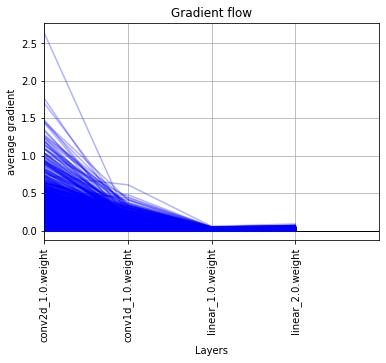

In [31]:
#run train with stuff
#slow
epochs = 5 
lossList = []

model.train()


for epoch in range(epochs):
    totalLoss = 0
    imgPat = '/content/leedsbutterfly/images/'

    for idx, imgName in enumerate(butTrain):
        #print(pat + i)
        #with open(imgPat + img) as f:
          #butname = butterNames['Heliconius erato\n']
          butname = 5

          print(imgName)
          label = torch.zeros(10) 


          butter_type = imgName[1:3]
          #print(j[0])
          if butter_type[0] == '0':
            #print('if')
            butter_type=butter_type[1]

          
          butter_type = int(butter_type)

          label[butter_type-1] = 1
                
          print(label)
          img = cv2.imread('/content/leedsbutterfly/images/'+ imgName) #second arg = col, ie 0=greyscale
          print('/content/leedsbutterfly/images/'+ imgName)
          #resize img
          print(img)
          img = cv2.resize(img, (300,300))
          #turns img (numpy array)into a torch tensor
          img = torch.tensor(img)
          img = img.to(torch.float32)
          loss, pred = train(img, label, model, loss_fn, optimizer)
          totalLoss += loss
          print(loss, pred)
    lossList.append(totalLoss)
          
plt.show()

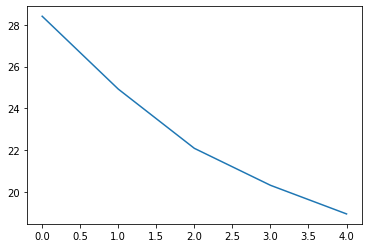

In [32]:
#plt to show how loss progresses
plt.plot(range(len(lossList)), lossList)

In [13]:
print(butterNames['Heliconius erato\n'])

('003.txt', '3')


In [33]:
img = cv2.imread('/content/leedsbutterfly/images/'+ imgName) #second arg = col, ie 0=greyscale
print('/content/leedsbutterfly/images/'+ imgName)
#resize img
print(img)
img = cv2.resize(img, (300,300))

img = torch.tensor(img)
img = img.to(torch.float32)

pred = model(img)
print(pred.argmax(), imgName)

/content/leedsbutterfly/images/0020143.png
[[[205 227 209]
  [199 221 203]
  [183 205 186]
  ...
  [ 47  95  71]
  [ 49  96  74]
  [ 50  97  75]]

 [[210 229 212]
  [204 226 208]
  [194 216 198]
  ...
  [ 45  91  69]
  [ 48  94  72]
  [ 49  95  73]]

 [[219 236 222]
  [217 236 219]
  [214 233 216]
  ...
  [ 37  79  61]
  [ 39  81  63]
  [ 40  82  64]]

 ...

 [[ 24  51  31]
  [ 29  56  36]
  [ 37  61  43]
  ...
  [210 217 204]
  [209 216 203]
  [210 217 204]]

 [[ 26  54  34]
  [ 31  59  39]
  [ 36  62  44]
  ...
  [209 216 203]
  [209 216 203]
  [208 215 202]]

 [[ 26  54  34]
  [ 31  59  39]
  [ 36  62  44]
  ...
  [208 215 202]
  [208 215 202]
  [208 215 202]]]
torch.Size([300, 300, 3])
torch.Size([1, 300, 300, 3])
torch.Size([1, 3, 300, 300])
torch.Size([298, 298])
for_lin11 torch.Size([298, 100])
aroudnd lin 2 torch.Size([296])
tensor(1) 0020143.png


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [34]:
##Evaluation

model.eval()

correct_preds = 0
count = 0

totalLoss = 0
imgPat = '/content/leedsbutterfly/images/'

for idx, imgName in enumerate(butTest):
    #print(pat + i)
    #with open(imgPat + img) as f:
      #butname = butterNames['Heliconius erato\n']

      label = torch.zeros(10) 

      butter_type = imgName[1:3]
      #print(j[0])
      if butter_type[0] == '0':
        butter_type=butter_type[1]
      
      butter_type = int(butter_type)

      label[butter_type-1] = 1
      print(label)
      img = cv2.imread('/content/leedsbutterfly/images/'+ imgName) #second arg = col, ie 0=greyscale
      print('/content/leedsbutterfly/images/'+ imgName)
      #resize img
      print(img)
      img = cv2.resize(img, (300,300))
      #turns img (numpy array)into a torch tensor
      img = torch.tensor(img)
      img = img.to(torch.float32)
      pred = model(img)
      print('pred ^ Lab', pred.shape, label.shape)
      print(pred)
      print(label)
      if pred.argmax() == label.argmax():
        correct_preds +=1
      count+=1
print()
print()
print('Final Accuracy: ', correct_preds / count * 100, '%')

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
/content/leedsbutterfly/images/0060193.png
[[[222 222 222]
  [222 222 222]
  [222 222 222]
  ...
  [222 222 222]
  [222 222 222]
  [222 222 222]]

 [[222 222 222]
  [222 222 222]
  [222 222 222]
  ...
  [222 222 222]
  [222 222 222]
  [222 222 222]]

 [[222 222 222]
  [222 222 222]
  [222 222 222]
  ...
  [222 222 222]
  [222 222 222]
  [222 222 222]]

 ...

 [[222 222 222]
  [222 222 222]
  [222 222 222]
  ...
  [222 222 222]
  [222 222 222]
  [222 222 222]]

 [[222 222 222]
  [222 222 222]
  [222 222 222]
  ...
  [222 222 222]
  [222 222 222]
  [222 222 222]]

 [[222 222 222]
  [222 222 222]
  [222 222 222]
  ...
  [222 222 222]
  [222 222 222]
  [222 222 222]]]
torch.Size([300, 300, 3])
torch.Size([1, 300, 300, 3])
torch.Size([1, 3, 300, 300])
torch.Size([298, 298])
for_lin11 torch.Size([298, 100])
aroudnd lin 2 torch.Size([296])
pred ^ Lab torch.Size([10]) torch.Size([10])
tensor([3.9009e-04, 3.5805e-04, 4.0785e-04, 2.3119e-02, 1.415

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Streaming output truncated to the last 5000 lines.
  ...
  [  1  99  15]
  [  0 100  12]
  [  1  95   0]]

 [[  1  47   0]
  [  0  50   0]
  [  0  50   0]
  ...
  [  0  99  13]
  [  0  96   6]
  [  0  94   3]]

 ...

 [[ 23 175  92]
  [ 29 176  94]
  [ 37 177  94]
  ...
  [  0  68   1]
  [  0  68   1]
  [  0  67   0]]

 [[ 17 175  85]
  [ 27 174  92]
  [ 28 175  90]
  ...
  [  0  72   0]
  [  0  67   0]
  [  0  68   1]]

 [[ 12 174  79]
  [ 13 175  79]
  [ 18 174  80]
  ...
  [  0  70   0]
  [  0  66   0]
  [  0  68   1]]]
torch.Size([300, 300, 3])
torch.Size([1, 300, 300, 3])
torch.Size([1, 3, 300, 300])
torch.Size([298, 298])
for_lin11 torch.Size([298, 100])
aroudnd lin 2 torch.Size([296])
pred ^ Lab torch.Size([10]) torch.Size([10])
tensor([1.5943e-09, 9.9996e-01, 1.6420e-06, 1.9681e-08, 4.3025e-07, 2.4034e-08,
        3.7878e-05, 3.6166e-07, 1.8191e-09, 8.9896e-07],
       grad_fn=<SoftmaxBackward0>)
tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 1

In [37]:
import pickle 

with open("Butterfly_Classification_Model.pkl", "wb") as f:
    pickle.dump(model, f)

